In [11]:
# prerequisite package imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


%matplotlib inline


We'll continue to make use of the fuel economy dataset in this workspace.

In [12]:
fuel_econ = pd.read_csv('../Datasets/fuel-econ.csv')
fuel_econ.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


### **Task 1**: 
Plot the distribution of combined fuel mileage (column 'comb', in miles per gallon) by manufacturer (column 'make'), for all manufacturers with at least eighty cars in the dataset. Consider which manufacturer order will convey the most information when constructing your final plot. 

**Hint**: Completing this exercise will take multiple steps! Add additional code cells as needed in order to achieve the goal.

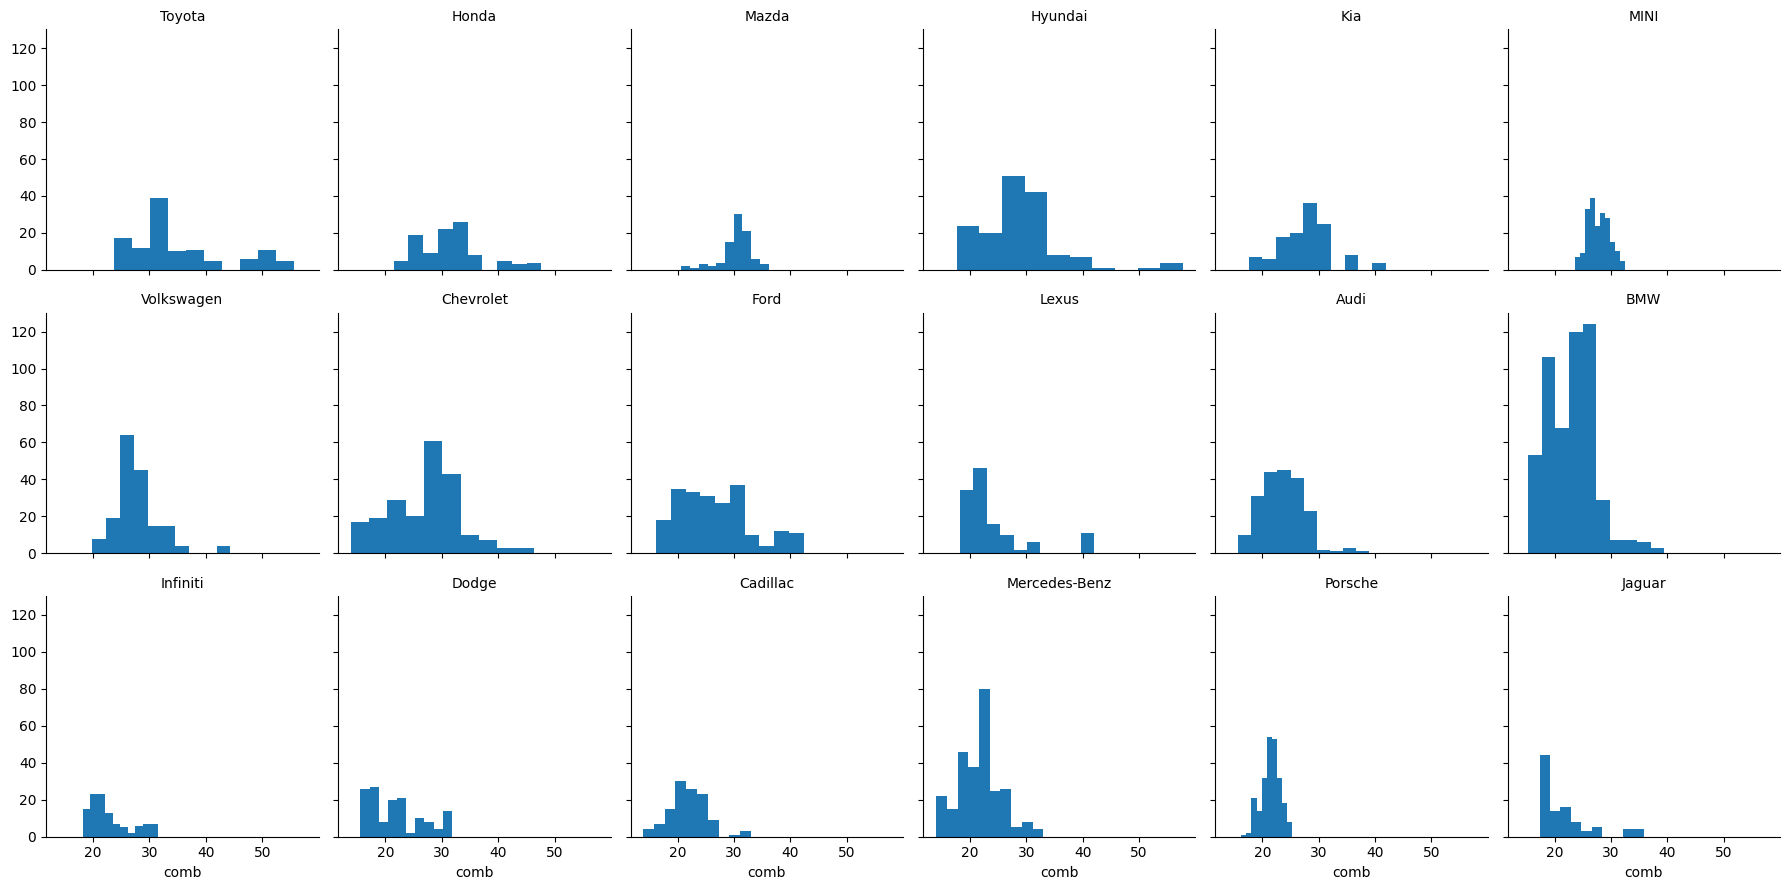

In [13]:
#Filter the data to only include manufacturers with at least 80 cars in the dataset
make_counts = fuel_econ['make'].value_counts()
most_makes = make_counts[make_counts >= 80].index
fuel_econ_sub = fuel_econ[fuel_econ['make'].isin(most_makes)]

# Calculate the mean combined fuel mileage for each manufacturer
make_means = fuel_econ_sub.groupby('make').mean()

# Sort the manufacturers by their mean combined fuel mileage in descending order
comb_order = make_means.sort_values('comb', ascending=False).index

# Create a FacetGrid to plot the distribution of combined fuel mileage by manufacturer
g = sns.FacetGrid(data=fuel_econ_sub, col='make', col_wrap=6, col_order=comb_order)
g.map(plt.hist, 'comb')
g.set_titles('{col_name}')

### **Task 2**: 
Continuing on from the previous task, plot the mean fuel efficiency for each manufacturer with at least 80 cars in the dataset.  Can you use error bars?

Text(0.5, 0, 'Average Combined Fuel Eff. (mpg)')

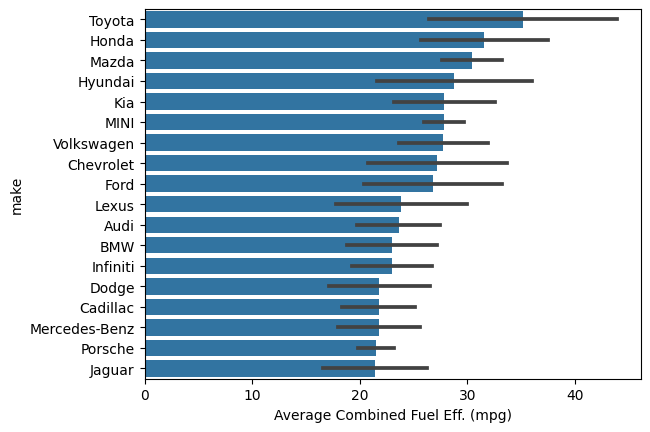

In [15]:
make_means = fuel_econ_sub.groupby('make').mean()
comb_order = make_means.sort_values('comb', ascending = False).index


base_color = sns.color_palette()[0]
sns.barplot(data = fuel_econ_sub, x = 'comb', y = 'make',
           color = base_color, order = comb_order, ci = 'sd')
plt.xlabel('Average Combined Fuel Eff. (mpg)')

Text(0, 0.5, 'Avg. Combined Fuel Mileage (mpg)')

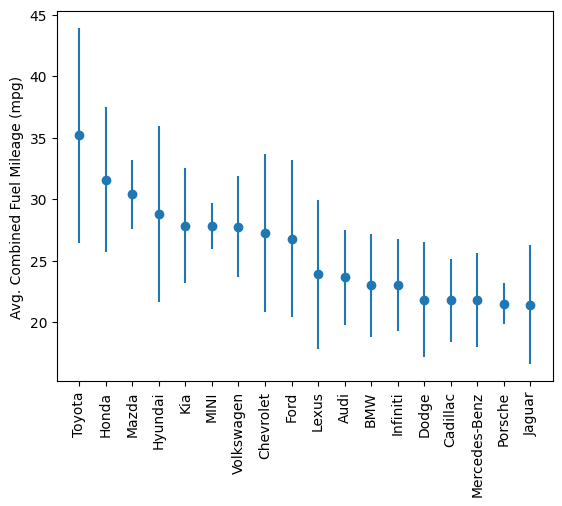

In [16]:
# Calculate the mean and standard deviation of combined fuel mileage for each manufacturer
make_means = fuel_econ_sub.groupby('make').mean()
make_std = fuel_econ_sub.groupby('make').std()

comb_order = make_means.sort_values('comb', ascending=False).index

# Plot the mean combined fuel mileage for each manufacturer, with error bars representing the standard deviation
plt.errorbar(x=make_means.loc[comb_order].index, y=make_means.loc[comb_order, 'comb'], yerr=make_std.loc[comb_order, 'comb'], fmt='o')
plt.xticks(rotation=90)
plt.ylabel('Avg. Combined Fuel Mileage (mpg)')